## Cargando las librerías

In [2]:
import numpy as np
import pandas as pd # son los que gneeran columanas para mostrar los datos como si fueran excel

import matplotlib.pyplot as plt    #generar graficos
from sklearn.model_selection import train_test_split  #separar los datos (train y test)
from sklearn.tree import DecisionTreeClassifier       #clase que arboles de desición

from google.colab import drive
drive.mount('/content/gdrive')  #a través de drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Cargando los datos del datset

In [3]:
# cargando los datos
data_ti = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/dataset_titanic.csv', encoding='utf-8')

## Conociendo los datos

In [4]:
print(data_ti.info())# mostrando información de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
data_ti.describe() # descripción de los datos de acuerdo a su valor estadístico
# Ya se observa que los datos no presentan los valores adecuados por ejemplo edad

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
data_ti.head() # revisando las cinco primeras filas de los registros

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [7]:
print(data_ti.keys()) # campos clave

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
#dimensiones del dataframo (12 columnas/891 filas)
data_ti.shape

(891, 12)

In [9]:
# identificando la presencia de valores (nulos edad y cabin tienen muchos)
data_ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# determinando los tipos de datos cada columna
data_ti.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Algunos gráficos

## Supervivientes por edad y sexo


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


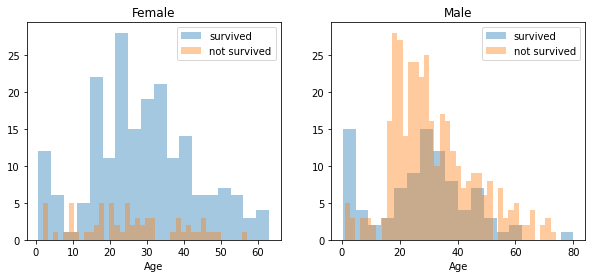

In [11]:
import seaborn as sns # para visualización de datos

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data_ti[data_ti['Sex']=='female']
men = data_ti[data_ti['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

## Supervivientes por clases

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


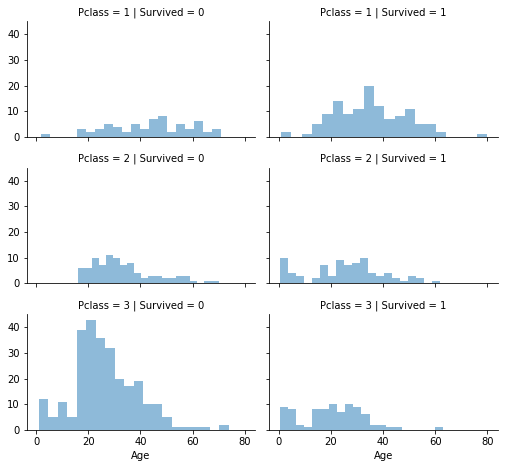

In [12]:
grid = sns.FacetGrid(data_ti, col='Survived', row='Pclass', size=2.2, aspect=1.6) # ayuda a generar un trazado celosía o enrejado
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

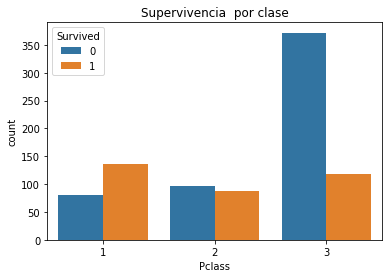

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=data_ti)
plt.title('Supervivencia  por clase')
plt.show()

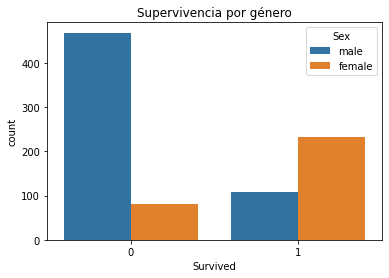

In [64]:
sns.countplot(x='Survived', hue='Sex', data=data_ti)
plt.title('Supervivencia por género')
plt.show()

##  Limpiando los datos

In [14]:
# Agrupando columnas por tipo de datos para facilitar el llenado de datos cuando son nulos
tipos = data_ti.columns.to_series().groupby(data_ti.dtypes).groups

# Armando lista de columnas categóricas
ctext = tipos[np.dtype('object')]
len(ctext)  # cantidad de columnas con datos categóricos 

5

In [15]:
# Armando lista de columnas numéricas para facilitar el llenado de datos cuando son nulos
columnas = data_ti.columns  # lista de todas las columnas con datos numéricos
cnum = list(set(columnas) - set(ctext))
len(cnum)

7

## Separando los datos que son nulos
Los datos nulos generan muchos conflictos para el análisis de los datos por lo cual se deben completar

In [16]:
# Completando valores faltantas datos cuantititavos
for c in cnum:
    mean = data_ti[c].mean()
    data_ti[c] = data_ti[c].fillna(mean)

In [17]:
# Completando valores faltantas datos categóricos
for c in ctext:
    mode = data_ti[c].mode()[0]
    data_ti[c] = data_ti[c].fillna(mode)

In [18]:
# Controlando que no hayan valores faltantes
data_ti.isnull().any().any()

False

In [19]:
data_ti.head () # verificando que hay un cambio en los datos después de llenar los datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [20]:
# Guardando el dataset preprocesado llenando los datos nulos
data_ti.to_csv("titanic_procesado.csv", index=False)

## Pasando a dataframe

In [21]:
# Se toma el archvos ya sin datos nulos y ese es el que convertimos en un dataframe
df_titanic= pd.read_csv("titanic_procesado.csv")

In [22]:
# identificando la presencia de valores nulos se evidencia que ya no hay valores nulos
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [66]:
#Convertir todos los valores de la columna Age en INT
df_titanic[['Age']] = df_titanic[['Age']].astype('int')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


#

## Seleccionando tres características para predecir los datos

In [24]:
#Seleccionando tres características para predecir los datos
X = df_titanic[['Pclass','Age','Sex']] 
y = df_titanic['Survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pclass  891 non-null    int64 
 1   Age     891 non-null    int64 
 2   Sex     891 non-null    object
dtypes: int64(2), object(1)
memory usage: 21.0+ KB


## Se divide la data dentro del grupo de entrenamiento y el test de pruebas

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=5)
from sklearn.feature_extraction import DictVectorizer # útil para entrenar clasificadores de secuencia en modelos de procesamiento
vec = DictVectorizer(sparse=False)

X_train = vec.fit_transform(X_train.to_dict(orient='record'))
print(vec.feature_names_)
X_test = vec.fit_transform(X_test.to_dict(orient='record'))

['Age', 'Pclass', 'Sex=female', 'Sex=male']


## Se instancia el árbol de decisión y se hacen predicciones

In [54]:
arbol = DecisionTreeClassifier(max_depth=3, random_state=0) # instancia
arbol.fit(X_train,Y_train) # entrena
y_predict = arbol.predict(X_test) # predice

## Se revisa el efecto del modelo

In [51]:
from sklearn.metrics import classification_report
print(arbol.score(X_test,Y_test))
print(classification_report(y_predict,Y_test,target_names=['died','survived']))

0.7937219730941704
              precision    recall  f1-score   support

        died       0.86      0.82      0.84       145
    survived       0.69      0.74      0.72        78

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.80      0.79      0.80       223



## Se mide la precisión del modelo

In [55]:
accuracy= arbol.score(X_test,Y_test)
print(accuracy)

0.8340807174887892


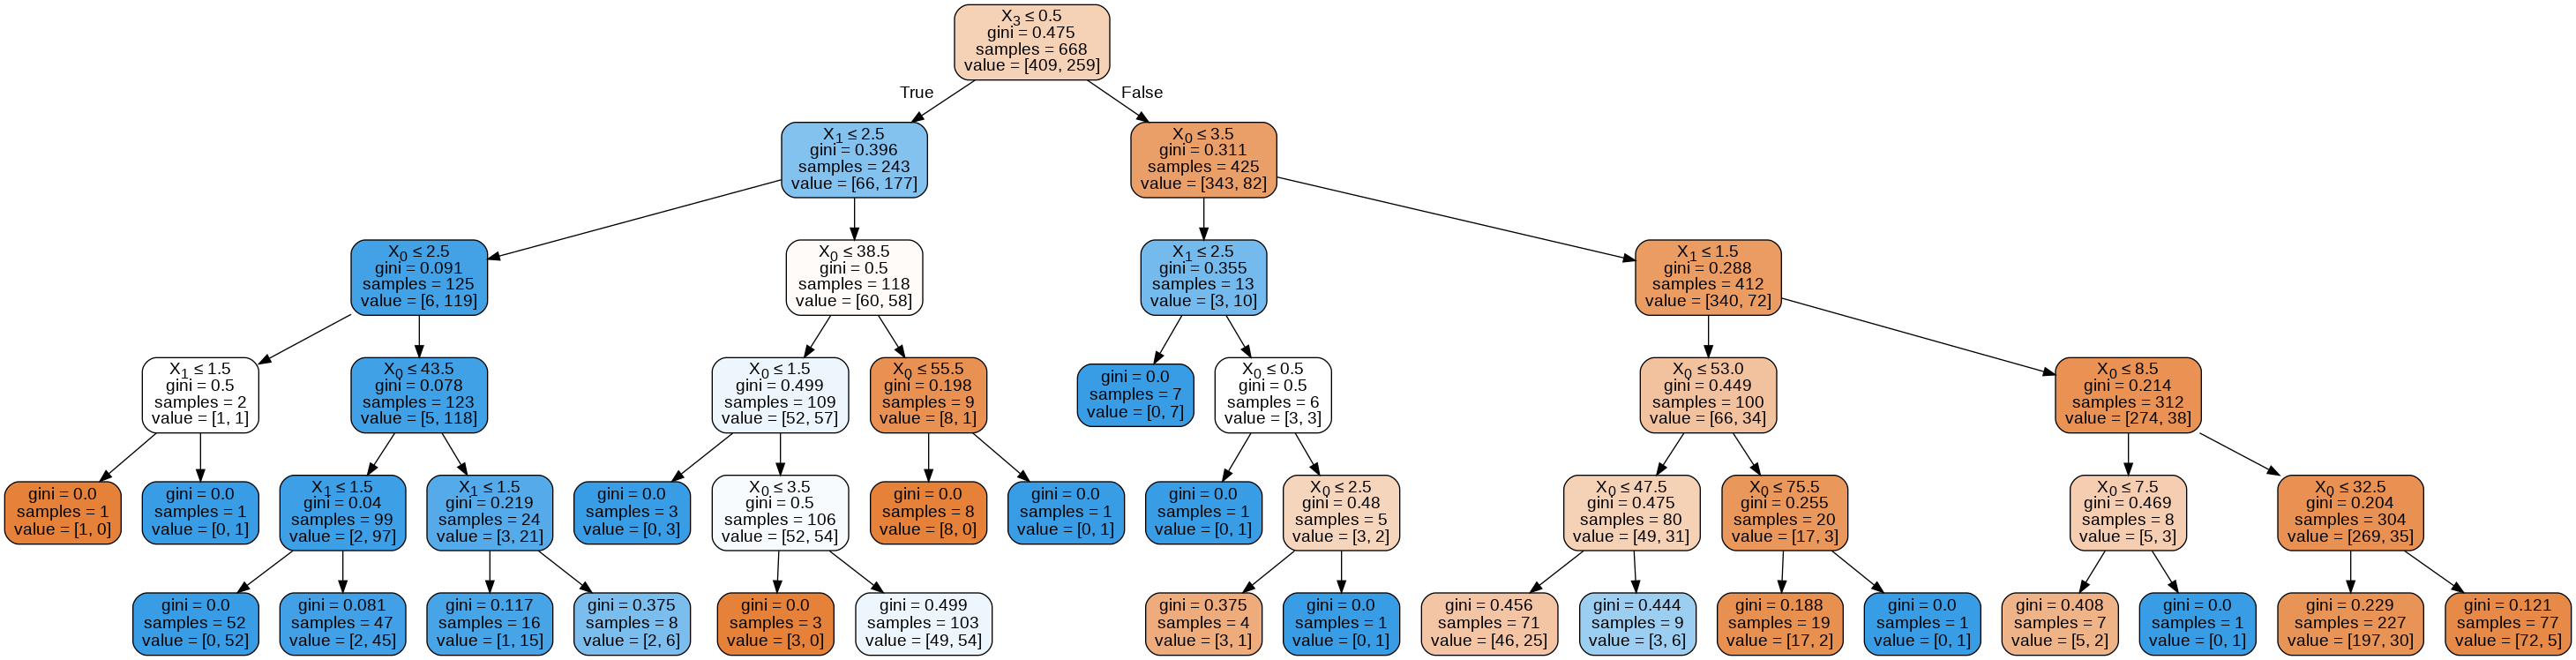

In [63]:
# Graficando el árbol de decisiones
from sklearn import tree
from IPython.display import Image 
import pydotplus

dot_data = tree.export_graphviz(arbol, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Titanic - Arbol de decisión.png')
Image(graph.create_png()) # para crear la imagen en la visual

## Probando el árbol con distintas profundidades

In [57]:
#lista_de_profundidades (1-6)
depth_list = list(range(1,6))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  arbol = DecisionTreeClassifier(max_depth=depth,random_state=0)
  arbol.fit(X_train,Y_train)
  score= arbol.score(X_test,Y_test)
  accuracy_list.append(score)

## Graficando resultados profundida/precisión 

<function matplotlib.pyplot.show>

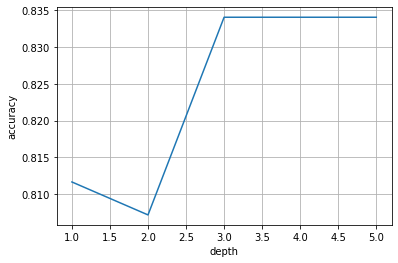

In [58]:
plt.plot (depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show

##Para concluir 
Murieron más hombres que mujeres, sobretodo en la tercera clase.